In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('/content/traffic_index.csv') #write your data path
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


Data cleaning

# Meanning of each index

**City:** Name of the city where traffic data is recorded.      
**Datetime:** Timestamp of the traffic data.          
**TrafficIndexLive:** Current traffic index (live).        
**JamsCount:** Number of traffic jams recorded.       
**JamsDelay:** Delay caused by traffic jams.        
**JamsLength:** Length of traffic jams in the city.       
**TrafficIndexWeekAgo:** Traffic index from one week ago for comparison.      
**TravelTimeHistoric:** Historical travel time.       
**TravelTimeLive:** Current travel time.

In [76]:
df.describe()
#delete jams delay, james count, james length, TrafficIndexWeekAgo

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [77]:
live_avg= df['TravelTimeLive'].mean()
historic_avg= df['TravelTimeHistoric'].mean()
df.fillna({'TravelTimeLive': live_avg, 'TravelTimeHistoric': historic_avg}, inplace=True)

### Checking For Wrong Data Types

In [78]:
df.dtypes

,0
City,object
Datetime,object
TrafficIndexLive,int64
JamsCount,int64
JamsDelay,float64
JamsLength,float64
TrafficIndexWeekAgo,int64
TravelTimeHistoric,float64
TravelTimeLive,float64


Checking for duplicates

In [79]:
df.duplicated().sum()

0

**Date Type Is Object and it should be Date**

In [80]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.dtypes

,0
City,object
Datetime,datetime64[ns]
TrafficIndexLive,int64
JamsCount,int64
JamsDelay,float64
JamsLength,float64
TrafficIndexWeekAgo,int64
TravelTimeHistoric,float64
TravelTimeLive,float64


###  Creating New Columns For Year, Month, Day, Hour

In [81]:
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month_name()
df['MonthNum'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day_name()
df['DayNum'] = df['Datetime'].dt.dayofweek
df['Hour'] = df['Datetime'].dt.hour
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617,2023,July,7,Friday,4,8
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629,2023,July,7,Friday,4,9
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834,2023,July,7,Friday,4,10
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917,2023,July,7,Friday,4,11
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246,2023,July,7,Friday,4,12


### Let's Create Time of Day Column

In [82]:
bins= np.linspace(df['Hour'].min(), df['Hour'].max(), 5)
labels = ['Early Morning (12am-6am)', 'Morning (6am-12pm)', 'Afternoon (12pm-6pm)', 'Evening (6pm-12am)']

df['Time of Day'] = pd.cut(df['Hour'], bins=bins, labels=labels, include_lowest=True)
df.head()


,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour,Time of Day
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617,2023,July,7,Friday,4,8,Morning (6am-12pm)
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629,2023,July,7,Friday,4,9,Morning (6am-12pm)
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834,2023,July,7,Friday,4,10,Morning (6am-12pm)
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917,2023,July,7,Friday,4,11,Morning (6am-12pm)
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246,2023,July,7,Friday,4,12,Afternoon (12pm-6pm)


# Exploratory Data Analysis(EDA)

In [83]:
# Check for the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

# Check for data types and missing values
df.info()

# Check for the unique values in each column
df.nunique()

Dataset contains 66639 rows and 16 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 66639 non-null  object        
 1   Datetime             66639 non-null  datetime64[ns]
 2   TrafficIndexLive     66639 non-null  int64         
 3   JamsCount            66639 non-null  int64         
 4   JamsDelay            66639 non-null  float64       
 5   JamsLength           66639 non-null  float64       
 6   TrafficIndexWeekAgo  66639 non-null  int64         
 7   TravelTimeHistoric   66639 non-null  float64       
 8   TravelTimeLive       66639 non-null  float64       
 9   Year                 66639 non-null  int32         
 10  Month                66639 non-null  object        
 11  MonthNum             66639 non-null  int32         
 12  Day                  66639 non-null  object  

,0
City,11
Datetime,22242
TrafficIndexLive,102
JamsCount,768
JamsDelay,12637
JamsLength,4137
TrafficIndexWeekAgo,102
TravelTimeHistoric,62773
TravelTimeLive,62773
Year,2


In [84]:
df.describe()

,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Year,MonthNum,DayNum,Hour
count,66639,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000
mean,2023-07-21 19:21:11.079652864,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451,2022.972073,7.496856,2.995543,11.499887
min,2022-12-16 11:01:30,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235,2022.000000,1.000000,0.000000,0.000000
25%,2023-05-04 19:01:15,3.000000,9.000000,27.700000,3.000000,3.000000,63.525681,61.195288,2023.000000,5.000000,1.000000,5.000000
50%,2023-08-11 02:16:30,10.000000,29.000000,95.700000,12.200000,10.000000,69.682368,69.286516,2023.000000,8.000000,3.000000,12.000000
75%,2023-10-13 05:01:30,21.000000,95.000000,336.600000,53.500000,21.000000,75.697609,76.389208,2023.000000,10.000000,5.000000,18.000000
max,2023-12-15 08:46:30,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139,2023.000000,12.000000,6.000000,23.000000
std,NaN,13.488906,107.452022,470.013224,85.352525,13.454922,10.276571,11.614321,0.164764,3.222785,2.001731,6.926739


In [85]:
# Display the column names in the DataFrame
print(df.columns)

Index(['City', 'Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay',
       'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric',
       'TravelTimeLive', 'Year', 'Month', 'MonthNum', 'Day', 'DayNum', 'Hour',
       'Time of Day'],
      dtype='object')


## visualization


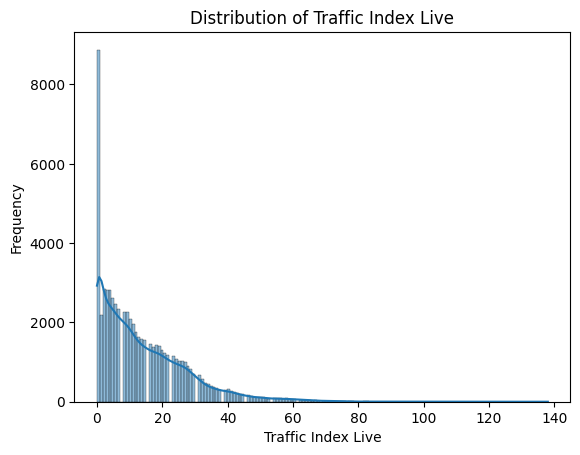

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the 'TrafficIndexLive' column
sns.histplot(df['TrafficIndexLive'], kde=True)  # Use the correct column name
plt.title('Distribution of Traffic Index Live')
plt.xlabel('Traffic Index Live')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.show()

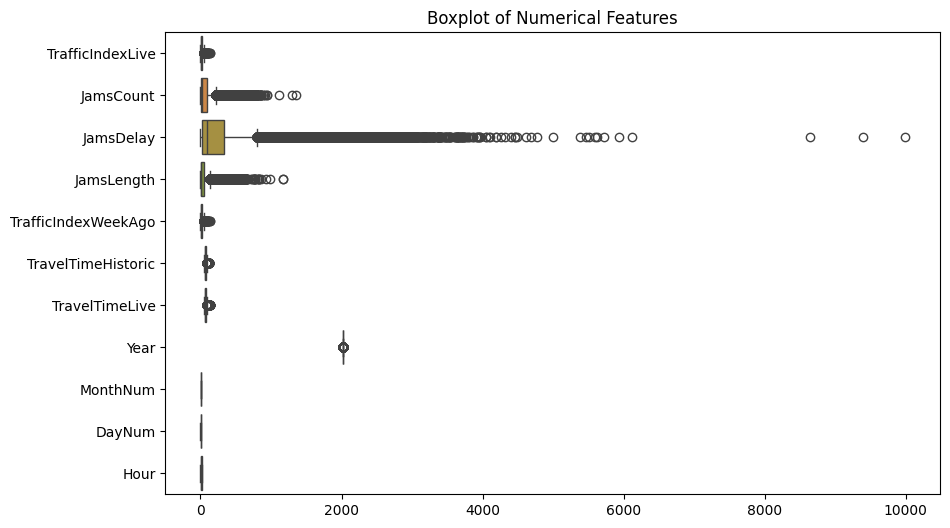

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include='number'), orient='h')
plt.title('Boxplot of Numerical Features')
plt.show()


\### Let's See How The Traffic Index differ form each city in differnet moths

In [88]:
monthly_avg = df.groupby(['Month','City'])['TrafficIndexLive'].mean().reset_index()
monthly_avg.sort_values(by='Month', ascending=True, inplace=True)
monthly_avg.head(100)

,Month,City,TrafficIndexLive
0,April,Cairo,5.405367
1,April,Doha,14.799718
2,April,Dubai,17.289548
3,April,Kuwait,13.574048
4,April,Riyadh,15.609309
...,...,...,...
90,September,Dubai,26.198611
91,September,Jeddah,16.836111
92,September,Kuwait,13.218056
93,September,Mecca,3.068056


In [89]:
monthly_avg['City'].value_counts()
#meanning that the cites that has 12 vlaue counts containes data for the whole year, while 6 is half a yer

,count
City,
Cairo,12
Doha,12
Dubai,12
Kuwait,12
Riyadh,12
Medina,6
Mecca,6
Jeddah,6
Dammam,6


:**We noticed that some cities only have data for 6 months only
Now we are deleting those
and saving the data in a new CSV file**

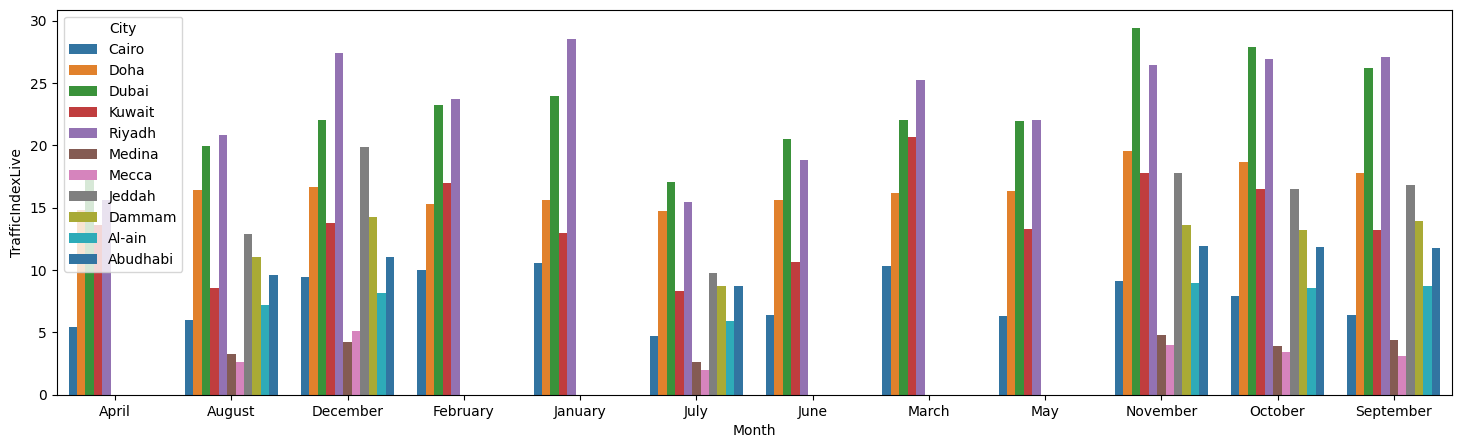

In [90]:
plt.figure(figsize=(18,5))
sns.barplot(x='Month', y='TrafficIndexLive',palette='tab10', hue='City', data=monthly_avg)
plt.show()

### only for ("Abudhabi", "Al-ain", "Dammam", "Jeddah", "Mecca","Medina")

In [91]:
months_12 = df[df['City'].isin(["Cairo", "Doha", "Dubai", "Kuwait", "Riyadh"])]
months_6 = df[df['City'].isin(["Abudhabi", "Al-ain", "Dammam", "Jeddah", "Mecca","Medina"])]

In [92]:
import warnings

warnings.filterwarnings('ignore')

<Axes: xlabel='Month', ylabel='TrafficIndexLive'>

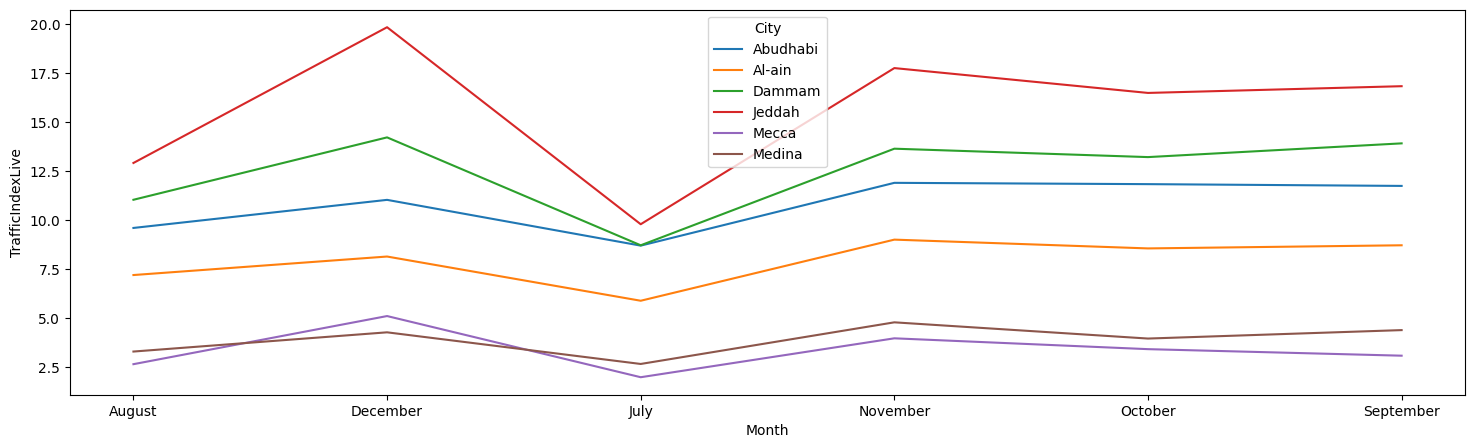

In [93]:
six_months_avg = months_6.groupby(['Month','City'])['TrafficIndexLive'].mean().reset_index()
six_months_avg.sort_values(by='Month', ascending=True, inplace=True)
plt.figure(figsize=(18,5))
sns.lineplot(x='Month', y='TrafficIndexLive',palette='tab10', hue='City', data=six_months_avg)

### for ("Cairo", "Doha", "Dubai", "Kuwait", "Riyadh") The cities that we will work on them

<Axes: xlabel='Month', ylabel='TrafficIndexLive'>

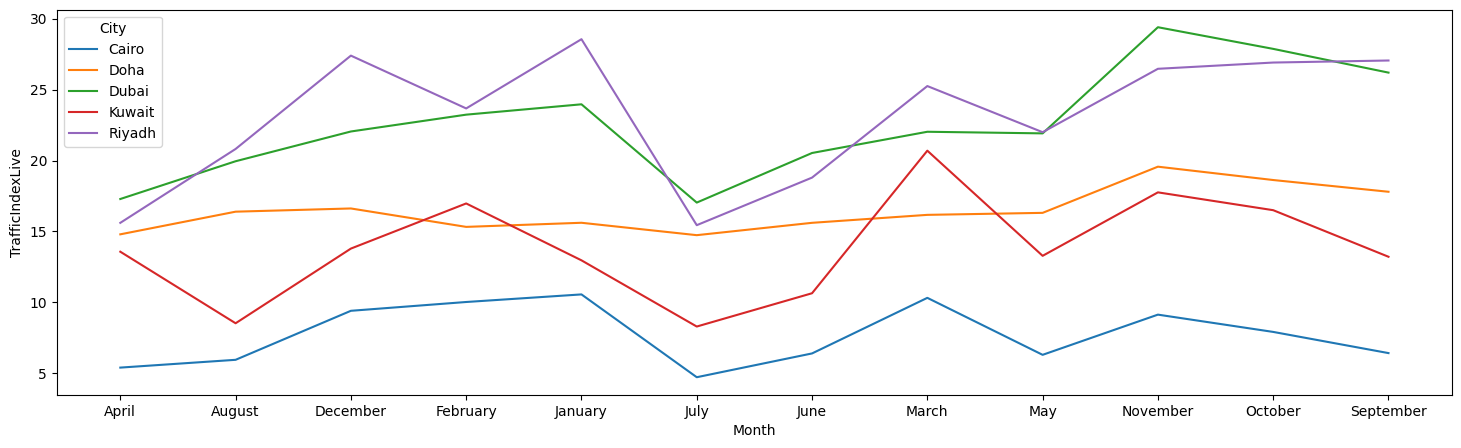

In [94]:
twelve_months_avg = months_12.groupby(['Month','City'])['TrafficIndexLive'].mean().reset_index()
twelve_months_avg.sort_values(by='Month', ascending=True, inplace=True)
plt.figure(figsize=(18,5))
sns.lineplot(x='Month', y='TrafficIndexLive',palette='tab10', hue='City', data=twelve_months_avg)

**Traffic Index Is lower in Month of [July] In All Cities.**

**Higher Traffic Index In Months of [August, September, October, November, December]**

> Add blockquote



## Comparing The Total Jams Of Cairo, Doha, Dubai, Kuwait, Riyadh.

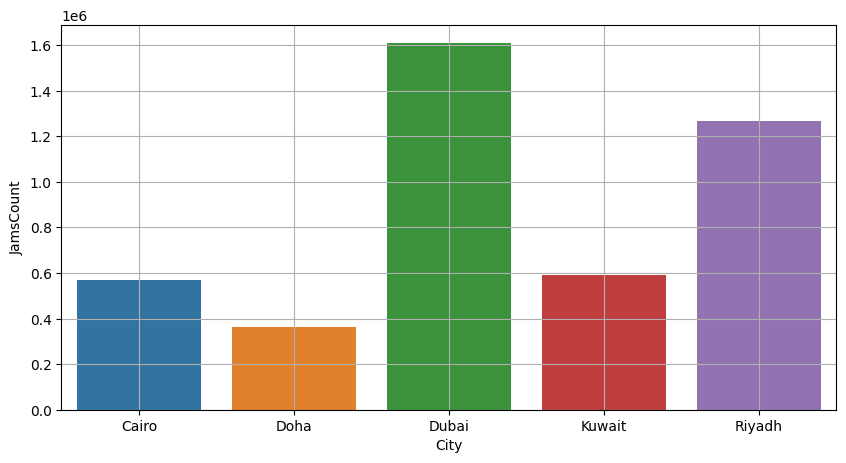

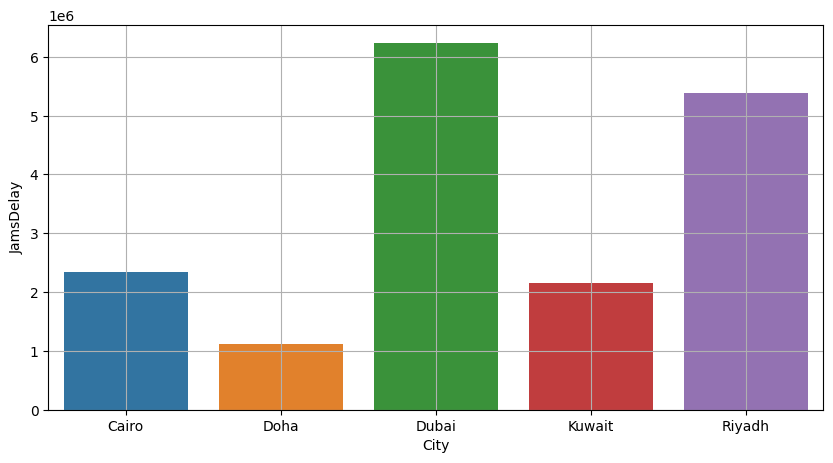

In [95]:
total_jams = months_12.groupby(['City'])['JamsCount'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='City', y='JamsCount',palette='tab10', hue='City', data=total_jams)
plt.grid()
plt.show()
print('\n\n')
#jams Delay
jams_delay = months_12.groupby(['City'])['JamsDelay'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='City', y='JamsDelay',palette='tab10', hue='City', data=jams_delay)
plt.grid()

**We Can Notice That Kuwait Has Higher Total Jams Than Cairo But Seems To Have Lower Jams Delay**

**Dubai Has The Highest Total Jams.**

([<matplotlib.patches.Wedge at 0x7e4a5850dc30>,
 [Text(1.0110153155135702, 0.4334143880825787, 'Cairo'),
  Text(0.5281720839519458, 0.9649011606034367, 'Doha'),
  Text(-0.866983691476489, 0.6770075913265673, 'Dubai'),
  Text(-0.6763524955115979, -0.8674948425294725, 'Kuwait'),
  Text(0.6793922348906498, -0.8651162876574965, 'Riyadh')],
 [Text(0.5514628993710382, 0.2364078480450429, '12.9%'),
  Text(0.28809386397378856, 0.5263097239655108, '8.3%'),
  Text(-0.4729001953508121, 0.36927686799630943, '36.6%'),
  Text(-0.36891954300632607, -0.47317900501607585, '13.5%'),
  Text(0.37057758266762714, -0.4718816114495435, '28.8%')])

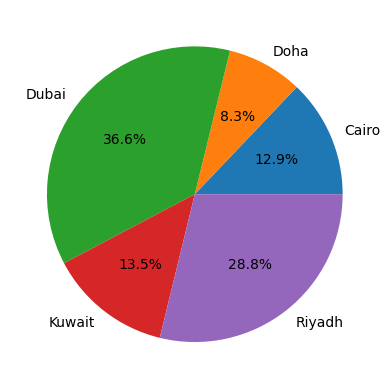

In [96]:
plt.pie(total_jams['JamsCount'], labels=total_jams['City'], autopct='%1.1f%%')

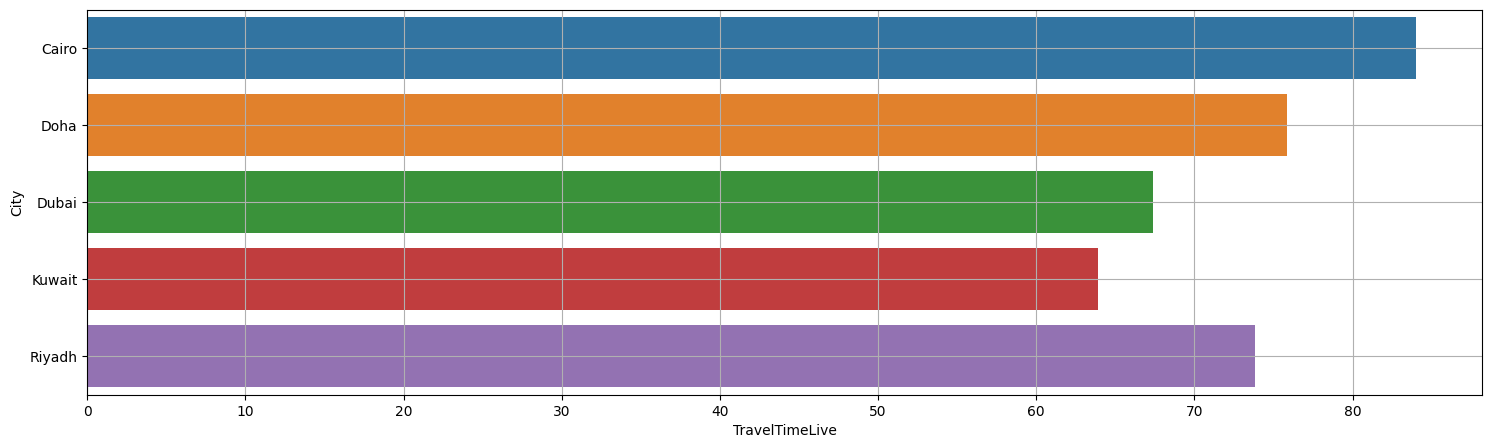

In [97]:
travel_time_12 = months_12.groupby(['City'])['TravelTimeLive'].mean().reset_index()
plt.figure(figsize=(18,5))
sns.barplot(x='TravelTimeLive', y='City',palette='tab10',orient='h', hue='City', data=travel_time_12)
plt.grid()

### Now Let's See Jams By Days.

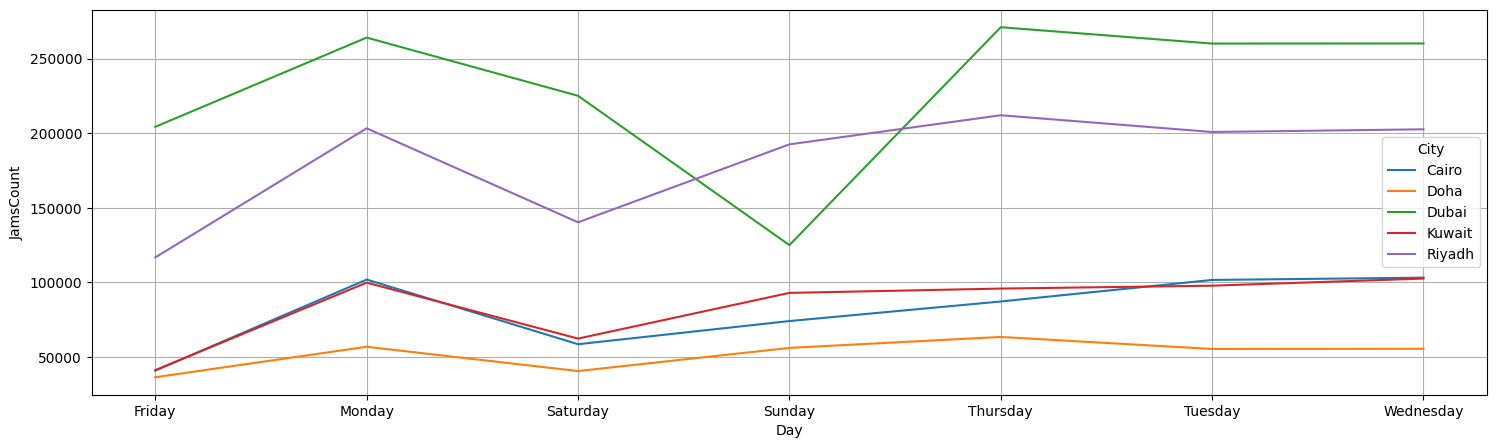

In [98]:
days_jams = months_12.groupby(['Day','City'])['JamsCount'].sum().reset_index()
days_jams.sort_values(by='Day', ascending=True, inplace=True)
plt.figure(figsize=(18,5))
sns.lineplot(x='Day', y='JamsCount',palette='tab10', hue='City', data=days_jams)
plt.grid()
plt.show()

**Most Cities Have Low Jams In Friday Considered as their weekend, But Also Dubai Has It's Weekend as Saturday - Sunday**

### Now Let's See Jams By Time Of Day.

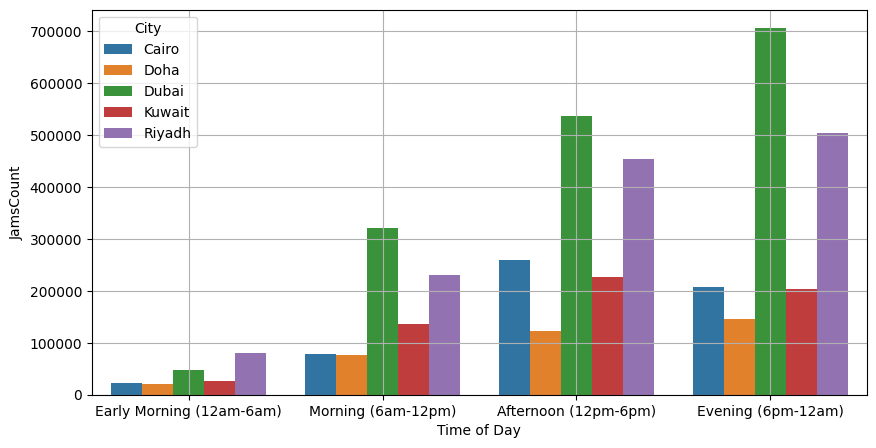

In [99]:
time_jams_by_city = months_12.groupby(['Time of Day','City'])['JamsCount'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Time of Day', y='JamsCount',palette='tab10', hue='City', data=time_jams_by_city)
plt.grid()
plt.show()

([<matplotlib.patches.Wedge at 0x7e4a583a3160>,
 [Text(1.089136085422437, 0.15421604141816828, 'Early Morning (12am-6am)'),
  Text(0.6993440345165427, 0.8490688555035597, 'Morning (6am-12pm)'),
  Text(-0.954877241146632, 0.5460855741916253, 'Afternoon (12pm-6pm)'),
  Text(0.3357399067342899, -1.047510723107907, 'Evening (6pm-12am)')],
 [Text(0.5940742284122383, 0.08411784077354632, '4.5%'),
  Text(0.38146038246356867, 0.46312846663830526, '19.1%'),
  Text(-0.5208421315345264, 0.2978648586499774, '36.3%'),
  Text(0.18313085821870353, -0.5713694853315856, '40.1%')])

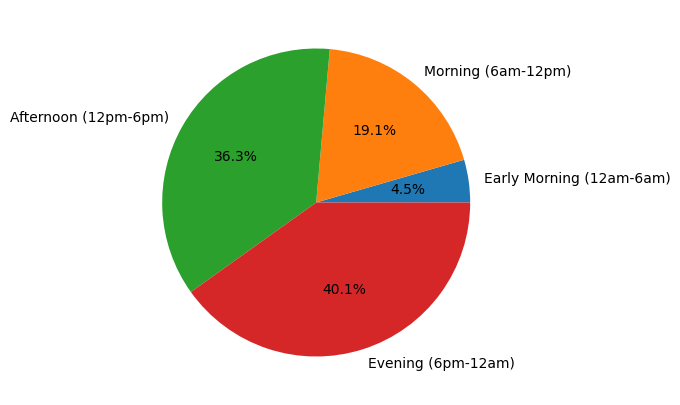

In [100]:
time_jams = months_12.groupby(['Time of Day'])['JamsCount'].sum().reset_index()
plt.figure(figsize=(5,5))
plt.pie(time_jams['JamsCount'], labels=time_jams['Time of Day'], autopct='%1.1f%%')

**It's Noticeable that most jams occur From 12pm To 12am**

*   List item
*   List item



### Comparing Total Jams of [Abudhabi, Al-ain, Dammam, Jeddah, Mecca, Medina]

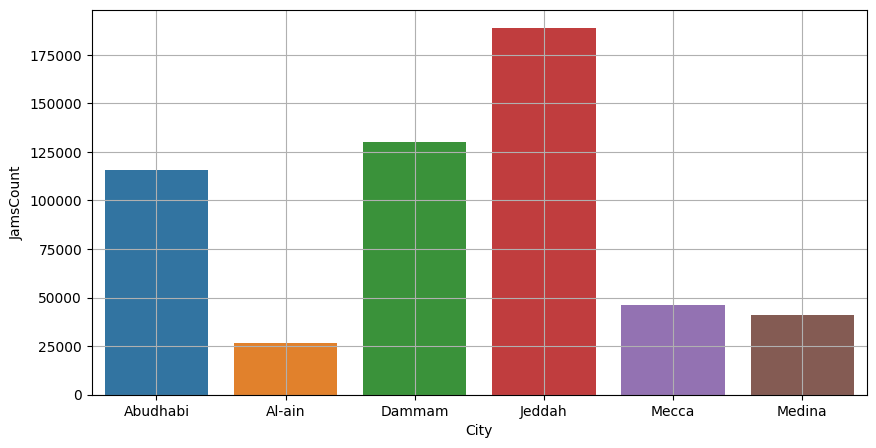

In [101]:
total_jams_6 = months_6.groupby(['City'])['JamsCount'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='City', y='JamsCount',palette='tab10', hue='City', data=total_jams_6)
plt.grid()
plt.show()

([<matplotlib.patches.Wedge at 0x7e4a582929b0>,
 [Text(0.867734946726762, 0.6760444232660334, 'Abudhabi'),
  Text(0.10496507198968298, 1.094980517480654, 'Al-ain'),
  Text(-0.7907075900864597, 0.7647100803439585, 'Dammam'),
  Text(-0.5380065999772496, -0.9594523950571595, 'Jeddah'),
  Text(0.8157457026659424, -0.7379423748383395, 'Mecca'),
  Text(1.0696206667651402, -0.25673260258271985, 'Medina')],
 [Text(0.4733099709418701, 0.36875150359965453, '21.1%'),
  Text(0.05725367563073616, 0.597262100443993, '4.8%'),
  Text(-0.4312950491380689, 0.41711458927852274, '23.8%'),
  Text(-0.29345814544213616, -0.5233376700311779, '34.4%'),
  Text(0.4449522014541503, -0.4025140226390942, '8.4%'),
  Text(0.5834294545991674, -0.1400359650451199, '7.5%')])

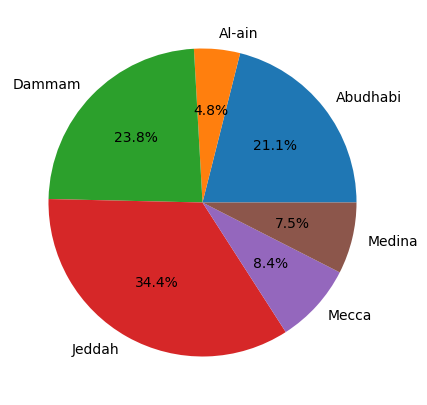

In [102]:
plt.figure(figsize=(5,5))
plt.pie(total_jams_6['JamsCount'], labels=total_jams_6['City'], autopct='%1.1f%%')

**Jeddah Has The Highest Total Jams**

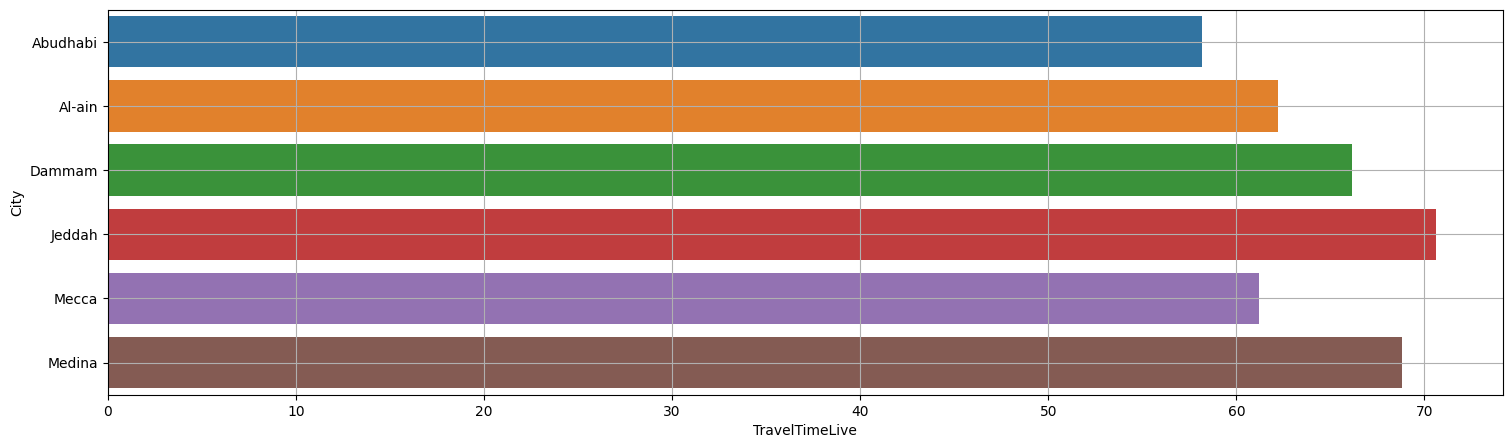

In [103]:
travel_time_6 = months_6.groupby(['City'])['TravelTimeLive'].mean().reset_index()
plt.figure(figsize=(18,5))
sns.barplot(x='TravelTimeLive', y='City',palette='tab10',orient='h', hue='City', data=travel_time_6)
plt.grid()
plt.show()

**Average Travel Time Is Close to 1 Hour In All Cities**

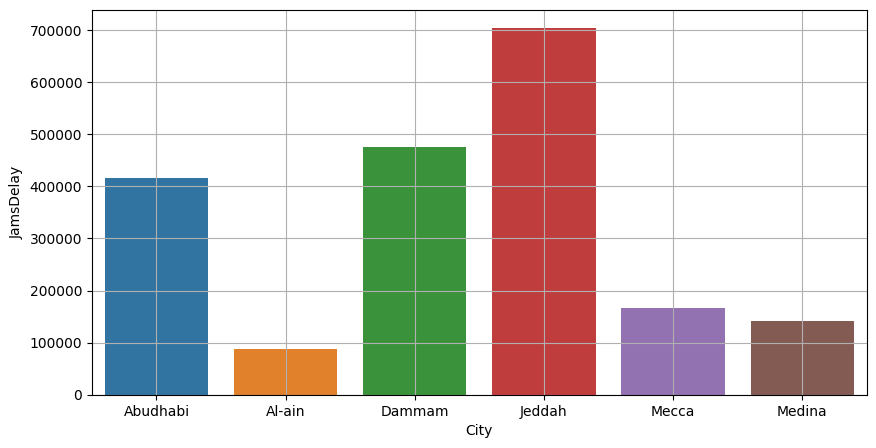

In [104]:
jams_delay_6 = months_6.groupby(['City'])['JamsDelay'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='City', y='JamsDelay',palette='tab10', hue='City', data=jams_delay_6)
plt.grid()
plt.show()

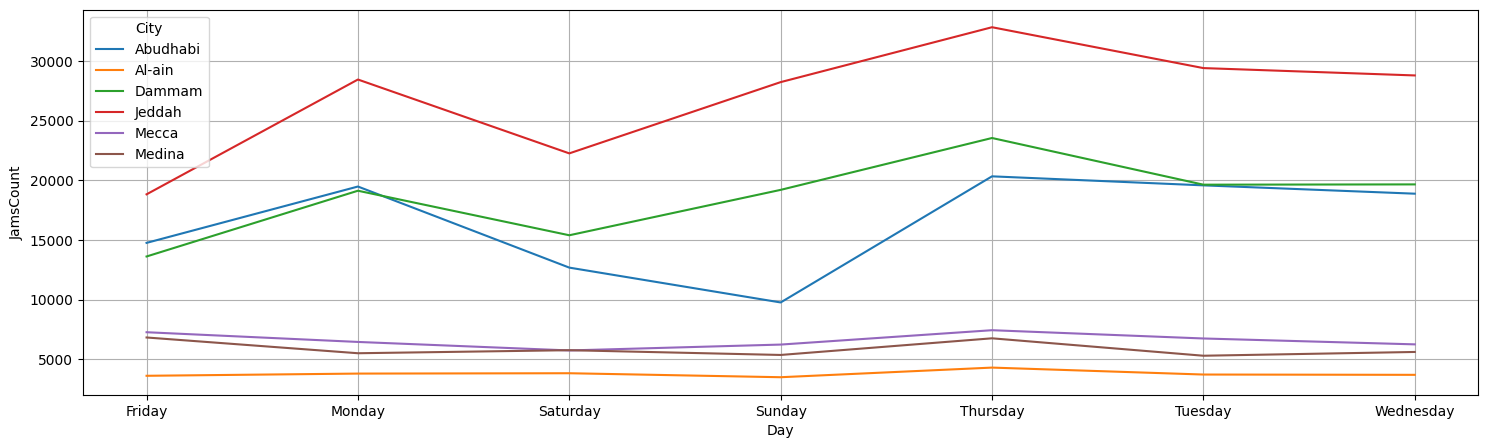

In [105]:
days_jams_6 = months_6.groupby(['Day','City'])['JamsCount'].sum().reset_index()
days_jams_6.sort_values(by='Day', ascending=True, inplace=True)
plt.figure(figsize=(18,5))
sns.lineplot(x='Day', y='JamsCount',palette='tab10', hue='City', data=days_jams_6)
plt.grid()
plt.show()

**Abu Dhabi Has Low Jams on Friday, Saturday and Sunday, While Jeddah and Al-Dammam Has Low Jams on Friday Only.**

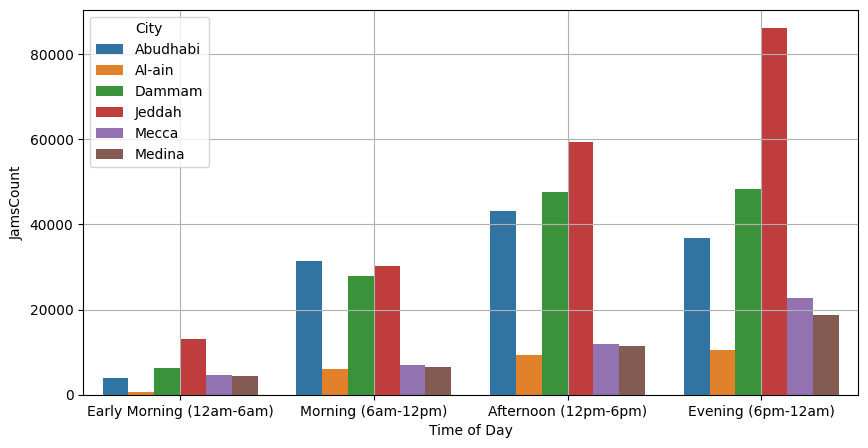

In [106]:
time_jams_by_city_6 = months_6.groupby(['Time of Day','City'])['JamsCount'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Time of Day', y='JamsCount',palette='tab10', hue='City', data=time_jams_by_city_6)
plt.grid()
plt.show()

([<matplotlib.patches.Wedge at 0x7e4a62bcd3f0>,
 [Text(1.0804787036620846, 0.20631473755575816, 'Early Morning (12am-6am)'),
  Text(0.5917592428380847, 0.9272653333947608, 'Morning (6am-12pm)'),
  Text(-0.9828773968895312, 0.49391499540271017, 'Afternoon (12pm-6pm)'),
  Text(0.3156370618965844, -1.053742494709828, 'Evening (6pm-12am)')],
 [Text(0.5893520201793188, 0.11253531139404989, '6.0%'),
  Text(0.3227777688207734, 0.5057810909425967, '19.9%'),
  Text(-0.536114943757926, 0.26940817931056915, '33.4%'),
  Text(0.17216567012540965, -0.5747686334780879, '40.7%')])

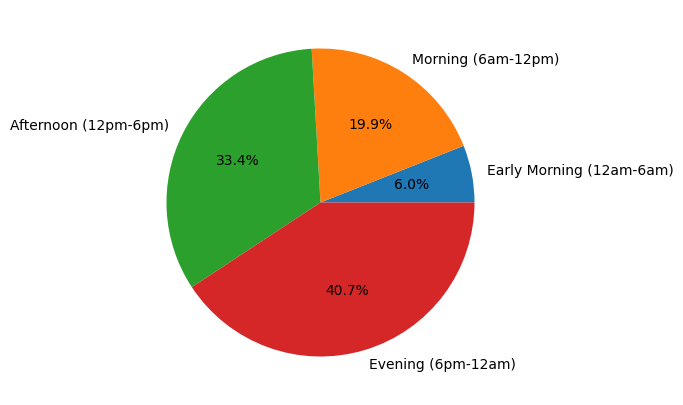

In [107]:
time_jams_6 = months_6.groupby(['Time of Day'])['JamsCount'].sum().reset_index()
plt.figure(figsize=(5,5))
plt.pie(time_jams_6['JamsCount'], labels=time_jams_6['Time of Day'], autopct='%1.1f%%')

**Most Jams Occur From 12pm To 12am**

# Conclusion

1. Most Of Cities Have Lower Jams on weekends.
2. Dubai Has The Highest Total Jams as well as Jams Delay.
3. While Kuwait Has Higher Amount of jams than Cairo, it seems to have lower Jams Delay.
4. Most of jams occur from 12pm to 12am.
5. Jeddah Has The Highest Amount of Jams in Saudi Arabia as well as Jams Delay.
6. Cairo Has The Highest Travel Time With Average Of 80+ Min.

# Pre-processing Data

In [108]:
# Remove unnecessary  columns
df.drop(columns=['JamsDelay', 'JamsCount', 'JamsLength','TrafficIndexWeekAgo','Time of Day'], axis=1, inplace=True)
df.head()

,City,Datetime,TrafficIndexLive,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour
0,Abudhabi,2023-07-07 08:01:30,6,59.611918,54.803617,2023,July,7,Friday,4,8
1,Abudhabi,2023-07-07 09:01:30,7,60.221387,56.118629,2023,July,7,Friday,4,9
2,Abudhabi,2023-07-07 10:46:30,7,59.161978,55.518834,2023,July,7,Friday,4,10
3,Abudhabi,2023-07-07 11:16:30,8,59.738138,56.413917,2023,July,7,Friday,4,11
4,Abudhabi,2023-07-07 12:01:30,8,58.958314,56.059246,2023,July,7,Friday,4,12


### Creating a new dataset with clean and filterd data based on our discoveries

In [109]:
words_to_remove = ['Abudhabi', 'Al-ain', 'Jeddah','Mecca', 'Medina', 'Dammam']
pattern = '|'.join(words_to_remove)
df_filtered_rows = df[~df.apply(lambda row: row.astype(str).str.contains(pattern, case=False).any(), axis=1)]
df_filtered_rows.to_csv('filtered_rows_dataset.csv', index=False)

In [110]:
print(df)
df.info()

           City            Datetime  TrafficIndexLive  TravelTimeHistoric  \
0      Abudhabi 2023-07-07 08:01:30                 6           59.611918   
1      Abudhabi 2023-07-07 09:01:30                 7           60.221387   
2      Abudhabi 2023-07-07 10:46:30                 7           59.161978   
3      Abudhabi 2023-07-07 11:16:30                 8           59.738138   
4      Abudhabi 2023-07-07 12:01:30                 8           58.958314   
...         ...                 ...               ...                 ...   
66634    Riyadh 2023-12-15 03:01:30                 8           63.926569   
66635    Riyadh 2023-12-15 04:31:30                 6           59.182641   
66636    Riyadh 2023-12-15 05:01:30                 3           57.746816   
66637    Riyadh 2023-12-15 06:01:30                 0           56.535277   
66638    Riyadh 2023-12-15 07:01:30                 0           56.126417   

       TravelTimeLive  Year     Month  MonthNum     Day  DayNum  Hour  
0  

### Creating New Columns For Year, Month, Day, Hour

In [111]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Now you can access datetime properties using .dt
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month_name()
df['MonthNum'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day_name()
df['DayNum'] = df['Datetime'].dt.dayofweek
df['Hour'] = df['Datetime'].dt.hour

df.head()

,City,Datetime,TrafficIndexLive,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour
0,Abudhabi,2023-07-07 08:01:30,6,59.611918,54.803617,2023,July,7,Friday,4,8
1,Abudhabi,2023-07-07 09:01:30,7,60.221387,56.118629,2023,July,7,Friday,4,9
2,Abudhabi,2023-07-07 10:46:30,7,59.161978,55.518834,2023,July,7,Friday,4,10
3,Abudhabi,2023-07-07 11:16:30,8,59.738138,56.413917,2023,July,7,Friday,4,11
4,Abudhabi,2023-07-07 12:01:30,8,58.958314,56.059246,2023,July,7,Friday,4,12


### Let's Create Time of Day Column

In [112]:
bins= np.linspace(df['Hour'].min(), df['Hour'].max(), 5)
labels = ['Early Morning (12am-6am)', 'Morning (6am-12pm)', 'Afternoon (12pm-6pm)', 'Evening (6pm-12am)']

df['Time of Day'] = pd.cut(df['Hour'], bins=bins, labels=labels, include_lowest=True)
df.head()


,City,Datetime,TrafficIndexLive,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour,Time of Day
0,Abudhabi,2023-07-07 08:01:30,6,59.611918,54.803617,2023,July,7,Friday,4,8,Morning (6am-12pm)
1,Abudhabi,2023-07-07 09:01:30,7,60.221387,56.118629,2023,July,7,Friday,4,9,Morning (6am-12pm)
2,Abudhabi,2023-07-07 10:46:30,7,59.161978,55.518834,2023,July,7,Friday,4,10,Morning (6am-12pm)
3,Abudhabi,2023-07-07 11:16:30,8,59.738138,56.413917,2023,July,7,Friday,4,11,Morning (6am-12pm)
4,Abudhabi,2023-07-07 12:01:30,8,58.958314,56.059246,2023,July,7,Friday,4,12,Afternoon (12pm-6pm)


In [113]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
df.info()
df.nunique()

Dataset contains 66639 rows and 12 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   City                66639 non-null  object        
 1   Datetime            66639 non-null  datetime64[ns]
 2   TrafficIndexLive    66639 non-null  int64         
 3   TravelTimeHistoric  66639 non-null  float64       
 4   TravelTimeLive      66639 non-null  float64       
 5   Year                66639 non-null  int32         
 6   Month               66639 non-null  object        
 7   MonthNum            66639 non-null  int32         
 8   Day                 66639 non-null  object        
 9   DayNum              66639 non-null  int32         
 10  Hour                66639 non-null  int32         
 11  Time of Day         66639 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int32(4), in

,0
City,11
Datetime,22242
TrafficIndexLive,102
TravelTimeHistoric,62773
TravelTimeLive,62773
Year,2
Month,12
MonthNum,12
Day,7
DayNum,7


Now we drop the columns that we do not need in the modeling phase

### Visualization the new data after cleaning

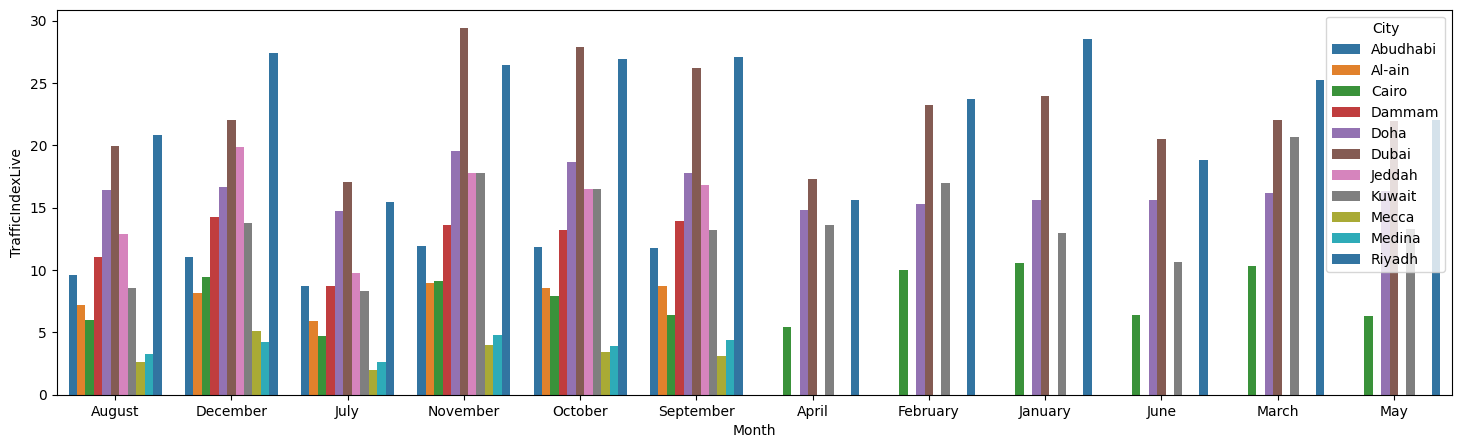

In [114]:
monthly_avg = df.groupby(['City', 'Month'])['TrafficIndexLive'].mean().reset_index()

# Now 'monthly_avg' DataFrame should have columns 'City', 'Month', and 'TrafficIndexLive'

plt.figure(figsize=(18,5))
sns.barplot(x='Month', y='TrafficIndexLive', palette='tab10', hue='City', data=monthly_avg)
plt.show()

# Moduling stage

> We are useing **"Random Forest regression model"**


In [115]:
!pip install -q scikit-learn
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [116]:
Day_to_number = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
months_12['Days_encoded'] = months_12['Day'].map(Day_to_number)

months_12

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour,Time of Day,Days_encoded
7728,Cairo,2022-12-16 11:01:30,0,23,86.0,9.4,0,70.706601,70.048451,2022,December,12,Friday,4,11,Morning (6am-12pm),4
7729,Cairo,2022-12-16 12:01:30,0,19,58.9,8.9,0,70.706601,70.048451,2022,December,12,Friday,4,12,Afternoon (12pm-6pm),4
7730,Cairo,2022-12-16 13:01:30,0,18,46.7,7.2,0,70.706601,70.048451,2022,December,12,Friday,4,13,Afternoon (12pm-6pm),4
7731,Cairo,2022-12-16 14:01:30,0,47,167.1,25.4,0,70.706601,70.048451,2022,December,12,Friday,4,14,Afternoon (12pm-6pm),4
7732,Cairo,2022-12-16 15:46:30,2,86,429.1,51.3,3,70.706601,70.048451,2022,December,12,Friday,4,15,Afternoon (12pm-6pm),4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473,2023,December,12,Friday,4,3,Early Morning (12am-6am),4
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955,2023,December,12,Friday,4,4,Early Morning (12am-6am),4
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438,2023,December,12,Friday,4,5,Early Morning (12am-6am),4
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218,2023,December,12,Friday,4,6,Morning (6am-12pm),4


In [117]:
City_to_number = {
    'Cairo': 1,
    'Doha': 2,
    'Dubai': 3,
    'Friday': 4,
    'Riyadh': 5
}
months_12['Cities_encoded'] = months_12['City'].map(City_to_number)

months_12

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour,Time of Day,Days_encoded,Cities_encoded
7728,Cairo,2022-12-16 11:01:30,0,23,86.0,9.4,0,70.706601,70.048451,2022,December,12,Friday,4,11,Morning (6am-12pm),4,1.0
7729,Cairo,2022-12-16 12:01:30,0,19,58.9,8.9,0,70.706601,70.048451,2022,December,12,Friday,4,12,Afternoon (12pm-6pm),4,1.0
7730,Cairo,2022-12-16 13:01:30,0,18,46.7,7.2,0,70.706601,70.048451,2022,December,12,Friday,4,13,Afternoon (12pm-6pm),4,1.0
7731,Cairo,2022-12-16 14:01:30,0,47,167.1,25.4,0,70.706601,70.048451,2022,December,12,Friday,4,14,Afternoon (12pm-6pm),4,1.0
7732,Cairo,2022-12-16 15:46:30,2,86,429.1,51.3,3,70.706601,70.048451,2022,December,12,Friday,4,15,Afternoon (12pm-6pm),4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473,2023,December,12,Friday,4,3,Early Morning (12am-6am),4,5.0
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955,2023,December,12,Friday,4,4,Early Morning (12am-6am),4,5.0
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438,2023,December,12,Friday,4,5,Early Morning (12am-6am),4,5.0
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218,2023,December,12,Friday,4,6,Morning (6am-12pm),4,5.0


In [118]:
months_12.columns

Index(['City', 'Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay',
       'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric',
       'TravelTimeLive', 'Year', 'Month', 'MonthNum', 'Day', 'DayNum', 'Hour',
       'Time of Day', 'Days_encoded', 'Cities_encoded'],
      dtype='object')

In [119]:
X = months_12[['Cities_encoded', 'Year', 'MonthNum','DayNum', 'Hour']]
y = months_12[['TrafficIndexLive']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We are Using the **"Random Forest Regressor model"**.

In [120]:
prediction_model = RandomForestRegressor(n_estimators=100, max_depth=13, random_state=42)
prediction_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, random_state=42)

In [121]:
y_pred = prediction_model.predict(X_test)

In [122]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2_score = prediction_model.score(X_test, y_test)
print(f'R-squared: {r2_score}')

Mean Squared Error: 32.76341251151897
R-squared: 0.8435519591280222


In [123]:
def predict(city , year, month, day, hour):
    data = np.array([city, year, month, day, hour])
    data = data.reshape(1,-1)
    predicted = prediction_model.predict(data)
    print(f"Predicted Traffic Index is: {predicted}")

In [124]:
print('Welcome to Achivers program!\n\n')
city_name = input('In what City would you like to know the approximate Traffic?\n(Riyadh, Cairo, Doha, Dobai, Kuwait)')
if (city_name.lower() == 'riyadh'):
    city = 5
elif(city_name.lower() == 'cairo'):
    city = 1
elif (city_name.lower() == 'doha'):
    city = 2
elif(city_name.lower() == 'kuwait'):
    city = 4
elif(city_name.lower() == 'dubai'):
    city = 3
else:
    print("Sorry , we don't have enough information about the city that you are looking for")

year = int(input('Enter the year: '))

month = int(input('What the number of the month? '))

day_name = input('What about the day? ')
if (day_name.lower() == 'tuesday'):
    day = 1
elif(day_name.lower() == 'wednesday'):
    day = 2
elif (day_name.lower() == 'thursday'):
    day = 3
elif(day_name.lower() == 'friday'):
    day = 4
elif(day_name.lower() == 'saturday'):
    day = 5
elif(day_name.lower() == 'sunday'):
    day = 6
elif(day_name.lower() == 'monday'):
    dat = 7
else:
    print("please make sure you write the name of the dat correctly")


hour = int(input('The Hour? '))

def predict(city , year, month, day, hour):
    data = np.array([city, year, month, day, hour])
    data = data.reshape(1,-1)
    predicted = prediction_model.predict(data)
    print(f"Predicted Traffic Index is: {predicted}")

Welcome to Achivers program!


In what City would you like to know the approximate Traffic?
(Riyadh, Cairo, Doha, Dobai, Kuwait)Doha
Enter the year: 2024
What the number of the month? 12
What about the day? Monday
The Hour? 12


In [125]:
new_data = np.array([[1, 2024, 12, 1, 12]])
new_data = new_data.reshape(1, -1)
predicted = prediction_model.predict(new_data)
print(f"Predicted Traffic Index is: {predicted}")

Predicted Traffic Index is: [4.36070375]


We are Implementing the **"Gradient Boosting Regressor model"**.


In [126]:
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [127]:
y_pred = model.predict(X_test)

In [128]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 55.49751457086306
R-squared: 0.7349947162914431


In [129]:
def predict(city , year, month, day, hour):
    data = np.array([city, year, month, day, hour])
    data = data.reshape(1,-1)
    predicted = prediction_model.predict(data)
    print(f"Predicted Traffic Index is: {predicted}")

In [130]:
new_data = np.array([[1, 2024, 12, 1, 12]])
new_data = new_data.reshape(1, -1)
predicted = model.predict(new_data)
print(f"Predicted Traffic Index is: {predicted}")

Predicted Traffic Index is: [9.17695953]


We are applying the **"Linear Regression model"**.


In [131]:
X = months_12[['Cities_encoded', 'Year', 'MonthNum','DayNum', 'Hour']]
y = months_12[['TrafficIndexLive']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [132]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2_score = model.score(X_test, y_test)
print(f'R-squared: {r2_score}')

Mean Squared Error: 55.49751457086306
R-squared: 0.39125491919598643
